In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential

In [3]:
df=pd.read_csv(r'E:\DiseasesDiagnosis\notebook\final.csv')

In [4]:
df.head()

,Unnamed: 0,Patient_ID,Gender,Date_of_Birth,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,0,1,Male,2006-05-05,144,72,106,26,37.3,86%,90,237,51881,Acute Respiratory Failure,18
1,1,2,Female,1949-08-02,95,65,102,26,37.4,93%,141,176,4019,Hypertension,75
2,2,3,Male,1996-08-18,173,112,60,20,36.8,94%,139,226,4100,Coronary Artery Disease,28
3,3,4,Male,1982-06-10,139,69,54,19,37.0,98%,150,180,4100,Coronary Artery Disease,42
4,4,5,Male,1956-01-14,173,85,83,19,36.7,97%,109,291,41401,Chronic Ischemic Heart Disease,69


In [5]:
df.drop(['Unnamed: 0','Date_of_Birth','Patient_ID'],axis=1,inplace=True)

In [6]:
df.head()

,Gender,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,Male,144,72,106,26,37.3,86%,90,237,51881,Acute Respiratory Failure,18
1,Female,95,65,102,26,37.4,93%,141,176,4019,Hypertension,75
2,Male,173,112,60,20,36.8,94%,139,226,4100,Coronary Artery Disease,28
3,Male,139,69,54,19,37.0,98%,150,180,4100,Coronary Artery Disease,42
4,Male,173,85,83,19,36.7,97%,109,291,41401,Chronic Ischemic Heart Disease,69


In [7]:
df['Oxygen Saturation']=df['Oxygen Saturation'].str.replace('%','').astype(int)

In [8]:
df.head()

,Gender,Blood Pressure (systolic),Blood Pressure (diastolic),Heart Rate,Respiratory Rate,Temperature (Celsius),Oxygen Saturation,Glucose Level,Cholesterol Level,Diagnosis Code,Diagnosis,Age
0,Male,144,72,106,26,37.3,86,90,237,51881,Acute Respiratory Failure,18
1,Female,95,65,102,26,37.4,93,141,176,4019,Hypertension,75
2,Male,173,112,60,20,36.8,94,139,226,4100,Coronary Artery Disease,28
3,Male,139,69,54,19,37.0,98,150,180,4100,Coronary Artery Disease,42
4,Male,173,85,83,19,36.7,97,109,291,41401,Chronic Ischemic Heart Disease,69


In [9]:
df.dtypes

Gender                         object
Blood Pressure (systolic)       int64
Blood Pressure (diastolic)      int64
Heart Rate                      int64
Respiratory Rate                int64
Temperature (Celsius)         float64
Oxygen Saturation               int32
Glucose Level                   int64
Cholesterol Level               int64
Diagnosis Code                  int64
Diagnosis                      object
Age                             int64
dtype: object

In [10]:
X=df.drop(['Diagnosis'],axis=1)
y=df['Diagnosis']

In [11]:
categorical_col=X.shape

In [12]:
# categorical_column=['Gender']
# numerical_column=['Blood_Pressure_systolic',
#  'Blood_Pressure_diastolic',
#  'Heart_Rate',
#  'Respiratory_Rate',
#  'Temperature_Celsius',
#  'Glucose_Level',
#  'Cholesterol_Level',
#  'Diagnosis_Code',
#  'Age',
#  'Oxygen_Saturation']

In [13]:
numerical_col=pd.DataFrame(X.select_dtypes(exclude='object')).columns.tolist()
categorical_col=pd.DataFrame(X.select_dtypes(include='object')).columns.tolist()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [15]:
## Numerical pipeline:
num_pipeline=Pipeline(
    steps=[
        ('Imputer',SimpleImputer(strategy='median')),
        ('Scaler',StandardScaler())
    ]
)

## Categorical Pipeline:
cat_pipeline = Pipeline(
    steps=[
        ('Imputer', SimpleImputer(strategy='most_frequent')),
        ('Encoder', OneHotEncoder(handle_unknown='ignore')),
        ('Scaler', StandardScaler(with_mean=False))  # with_mean=False because one-hot encoded data is sparse
    ]
)


In [16]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_col),
    ('cat_pipeline',cat_pipeline,categorical_col)
])

In [17]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['Blood Pressure (systolic)',
                                  'Blood Pressure (diastolic)', 'Heart Rate',
                                  'Respiratory Rate', 'Temperature (Celsius)',
                                  'Oxygen Saturation', 'Glucose Level',
                                  'Cholesterol Level', 'Diagnosis Code',
                                  'Age']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('Scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Gender'])])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800000, 11), (200000, 11), (800000,), (200000,))

In [21]:
x_train=preprocessor.fit_transform(X_train)
x_test=preprocessor.transform(X_test)

In [22]:
x_train=pd.DataFrame(x_train,columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(x_test,columns=preprocessor.get_feature_names_out())

In [23]:
x_train.shape[1]

12

In [24]:
y.value_counts()

Diagnosis
Acute Respiratory Failure         100489
Chronic Ischemic Heart Disease    100392
Asthma                            100301
Stroke                            100021
Heart Failure                      99917
Hypertension                       99887
Coronary Artery Disease            99869
Diabetes Mellitus                  99746
Syncope and Collapse               99724
Chronic Kidney Disease             99654
Name: count, dtype: int64

In [25]:
model=Sequential()
model.add(Dense(300,activation='relu',input_shape=(x_train.shape[1],), name='Inputlayer'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu',name='Firstlayer'))
model.add(BatchNormalization())
model.add(Dense(100,activation='relu',name='Secondlayer'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu',name='Thirdlayer'))
model.add(Dense(10,activation='softmax',name='outputlayer'))

d:\FINALYEARPROJECTREC\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (Dense)              │ (None, 300)            │         3,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Firstlayer (Dense)              │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Secondlayer (Dense)             │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Thirdlayer (Dense)              │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,760 (358.44 KB)

 Trainable params: 90,760 (354.53 KB)

 Non-trainable params: 1,000 (3.91 KB)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
encoder=LabelEncoder()

In [29]:
y_train=encoder.fit_transform(Y_train)
y_test=encoder.transform(Y_test)

array([8, 3, 4, ..., 5, 2, 9])

In [30]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [32]:
import time 
import os
def get_log_path(log_dir="log/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at log/fit\log_2025_04_15_12_46_40


In [33]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [34]:
CKPT_path = "Model_ckpt.keras"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [35]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=256,callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.6483 - loss: 0.8120 - val_accuracy: 0.8886 - val_loss: 0.2693
Epoch 2/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8502 - loss: 0.2998 - val_accuracy: 0.9127 - val_loss: 0.2043
Epoch 3/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8795 - loss: 0.2412 - val_accuracy: 0.8670 - val_loss: 0.2145
Epoch 4/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9107 - loss: 0.1878 - val_accuracy: 0.9694 - val_loss: 0.1005
Epoch 5/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9250 - loss: 0.1624 - val_accuracy: 0.9648 - val_loss: 0.0931
Epoch 6/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9338 - loss: 0.1456 - val_accuracy: 0.9863 - val_loss: 0.0775
Epoch 7/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9422 - loss: 0.1311 - val_accuracy: 0.9751 - val_loss: 0.0629
Epoch 8/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9478 -

In [36]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.766740,0.497351,0.888555,0.269346
1,0.857249,0.285895,0.912655,0.204314
2,0.889546,0.224482,0.866965,0.214511
3,0.913912,0.182494,0.969420,0.100510
4,0.927458,0.157644,0.964780,0.093111
5,0.937226,0.139062,0.986255,0.077525
6,0.944739,0.125515,0.975135,0.062890
7,0.948849,0.116929,0.994540,0.068753
8,0.955975,0.103300,0.979445,0.056474
9,0.960569,0.094296,0.999380,0.038976


<Axes: >

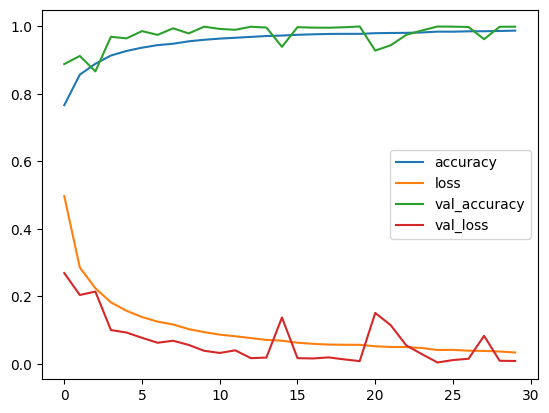

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
model.get_metrics_result()

{'accuracy': 0.9993849992752075, 'loss': 0.008840806782245636}

In [40]:
model.evaluate(x_test,y_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9999 - loss: 0.0044


[0.004408104345202446, 0.9998649954795837]

In [41]:
x_test[:3]

,num_pipeline__Blood Pressure (systolic),num_pipeline__Blood Pressure (diastolic),num_pipeline__Heart Rate,num_pipeline__Respiratory Rate,num_pipeline__Temperature (Celsius),num_pipeline__Oxygen Saturation,num_pipeline__Glucose Level,num_pipeline__Cholesterol Level,num_pipeline__Diagnosis Code,num_pipeline__Age,cat_pipeline__Gender_Female,cat_pipeline__Gender_Male
0,-0.404427,1.356156,-0.518624,0.672239,0.798605,-0.231622,-1.477794,0.451417,-0.518384,0.319512,2.000001,0.000000
1,-1.250813,1.182882,-0.518624,-0.291953,-1.598078,0.462683,1.344690,-1.072841,-0.428509,0.076876,0.000000,2.000001
2,-1.635535,0.605300,0.322694,0.286562,0.399158,1.388424,1.051791,0.012616,-0.531971,-0.339070,2.000001,0.000000


In [42]:
y_test[:3]

array([8, 3, 4])

In [45]:
y_prob=model.predict(x_test[:3])
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.997,
        0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [48]:
y_pred=np.argmax(y_prob,axis=-1)

In [58]:
Y_train.unique()

array(['Asthma', 'Heart Failure', 'Syncope and Collapse',
       'Acute Respiratory Failure', 'Stroke',
       'Chronic Ischemic Heart Disease', 'Coronary Artery Disease',
       'Hypertension', 'Diabetes Mellitus', 'Chronic Kidney Disease'],
      dtype=object)

In [54]:
pd.concat([pd.DataFrame(y_train),pd.DataFrame(Y_train)],axis=1)

,0,Diagnosis
0,1.0,NaN
1,6.0,Hypertension
2,9.0,Coronary Artery Disease
3,0.0,Coronary Artery Disease
4,8.0,Chronic Ischemic Heart Disease
...,...,...
989436,NaN,Acute Respiratory Failure
912756,NaN,Acute Respiratory Failure
899159,NaN,Diabetes Mellitus
954698,NaN,Chronic Kidney Disease


In [49]:
print("predict class")

array([8, 3, 4], dtype=int64)